## TP3

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

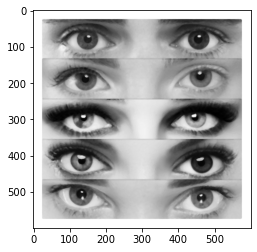

(600, 600)


In [3]:
# Leemos la imagen
#=================
img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

plt.imshow(gray, cmap='gray')
plt.show()
print(gray.shape)
n_caras = 5

#### Distancia entre ojos

0 120
distancia: 249.0


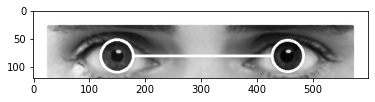

distancia: 281.0


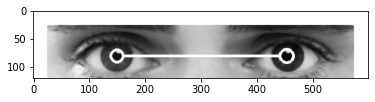

120 240
distancia: 254.12595302329905


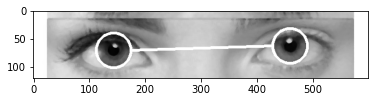

distancia: 292.1095684841563


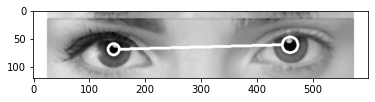

240 360
distancia: 249.00803199896987


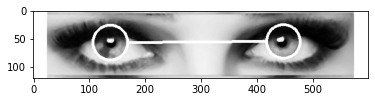

distancia: 322.3042041301975


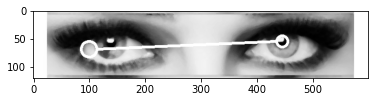

360 480
distancia: 270.0296280040396


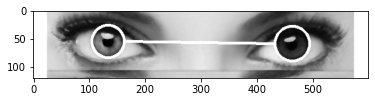

distancia: 303.0594001181947


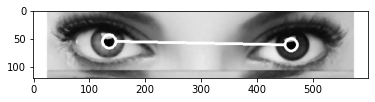

480 600
distancia: 268.1193763979023


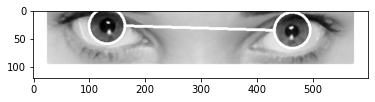

distancia: 306.1633550900565


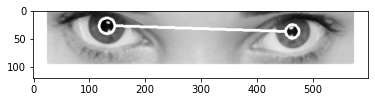

In [4]:
# Obtenemos el iris y la pupila por la transformada de Hough de círculos
#===================================================================

def HoughCirclesCalc(img, i, iris: True):
    
    if i == 0:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=100,param2=20,minRadius=2,maxRadius=20)
    elif i == 1:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=120,param2=20,minRadius=2,maxRadius=20)
    elif i == 2:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=120,param2=17,minRadius=2,maxRadius=20)
    elif i == 3:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=120,param2=20,minRadius=2,maxRadius=20)
    elif i == 4:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=100,param2=20,minRadius=2,maxRadius=20)
    elif i == 5:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=100,param2=20,minRadius=2,maxRadius=20)
    else:
        if iris is True:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
        else:
            return cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,minDist=100,param1=100,param2=20,minRadius=2,maxRadius=20)


for i in range(n_caras):

    step = gray.shape[0] / n_caras    
    iris = gray.copy()

    start = int(i*step)
    end = int((i+1)*step)
    print(start,end)

    iris = iris[start:end, :]
    #circles = cv.HoughCircles(iris,cv.HOUGH_GRADIENT,1,minDist=100,param1=260,param2=20,minRadius=10,maxRadius=60)
    circles = HoughCirclesCalc(iris, i, True)

    circles = np.int16(np.around(circles))
    #print(circles[0, :])
    if circles is not None and len(circles) > 0:
        if circles[0, :].shape[0] == 2:
            if circles[0, 0, 0] < circles[0, 1, 0]:
                c1 = circles[0, 0, :]
                c2 = circles[0, 1, :]
            else:
                c1 = circles[0, 1, :]
                c2 = circles[0, 0, :]

            # Dibujamos los iris
            cv.circle(iris,(c1[0],c1[1]),c1[2],(255,255,255),3)
            cv.circle(iris,(c2[0],c2[1]),c2[2],(255,255,255),3)

            # La línea que los une
            cv.line(iris,(c1[0]+c1[2],c1[1]),(c2[0]-c2[2],c2[1]),(255,0,0),3)

            a = np.array((c1[0]+c1[2], c1[1]))
            b = np.array((c2[0]-c2[2], c2[1]))

            dist = np.linalg.norm(b-a)
            print('distancia:', dist)

    plt.imshow(iris, cmap='gray')
    plt.show()


    pupil = gray.copy()
    pupil = pupil[start:end, :]
    #circles = cv.HoughCircles(pupil,cv.HOUGH_GRADIENT,1,minDist=100,param1=100,param2=20,minRadius=2,maxRadius=20)
    circles = HoughCirclesCalc(pupil, i, False)

    if circles is not None and len(circles) > 0:
        circles = np.int16(np.around(circles))
        if circles[0, :].shape[0] == 2:
            if circles[0, 0, 0] < circles[0, 1, 0]:
                c1 = circles[0, 0, :]
                c2 = circles[0, 1, :]
            else:
                c1 = circles[0, 1, :]
                c2 = circles[0, 0, :]

            # Dibujamos las pupilas
            cv.circle(pupil,(c1[0],c1[1]),c1[2],(255,255,255),3)
            cv.circle(pupil,(c2[0],c2[1]),c2[2],(255,255,255),3)

            # La línea que las une
            cv.line(pupil,(c1[0]+c1[2],c1[1]),(c2[0]-c2[2],c2[1]),(255,0,0),3)

            a = np.array((c1[0]+c1[2], c1[1]))
            b = np.array((c2[0]-c2[2], c2[1]))

            dist = np.linalg.norm(b-a)
            print('distancia:', dist)

    plt.imshow(pupil, cmap='gray')
    plt.show()
